In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras import layers, models


Epoch 1/10
197/197 [==============================] - 9s 18ms/step - loss: 0.0884 - accuracy: 0.9944 - val_loss: 0.0430 - val_accuracy: 0.9929
Epoch 2/10
197/197 [==============================] - 2s 11ms/step - loss: 0.0350 - accuracy: 0.9944 - val_loss: 0.0432 - val_accuracy: 0.9929
Epoch 3/10
197/197 [==============================] - 2s 12ms/step - loss: 0.0348 - accuracy: 0.9944 - val_loss: 0.0429 - val_accuracy: 0.9929
Epoch 4/10
197/197 [==============================] - 2s 11ms/step - loss: 0.0346 - accuracy: 0.9944 - val_loss: 0.0450 - val_accuracy: 0.9929
Epoch 5/10
197/197 [==============================] - 2s 12ms/step - loss: 0.0347 - accuracy: 0.9944 - val_loss: 0.0428 - val_accuracy: 0.9929
Epoch 6/10
197/197 [==============================] - 2s 11ms/step - loss: 0.0347 - accuracy: 0.9944 - val_loss: 0.0439 - val_accuracy: 0.9929
Epoch 7/10
197/197 [==============================] - 2s 12ms/step - loss: 0.0347 - accuracy: 0.9944 - val_loss: 0.0427 - val_accuracy: 0.9929

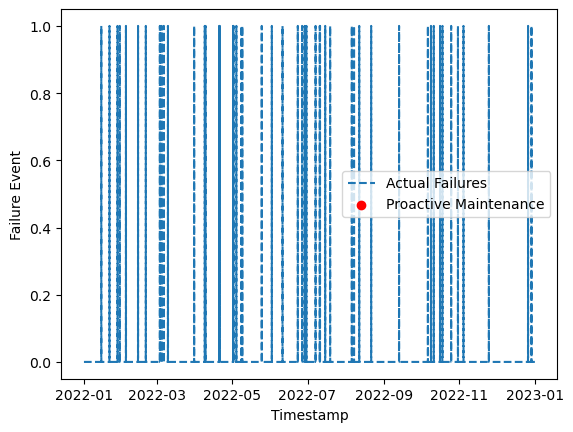

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load your dataset
# Assuming your dataset has columns like 'timestamp', 'sensor_reading', and 'failure_event'
# Make sure your dataset is sorted by timestamp
# Adjust the column names and data loading process accordingly

# Example data loading
# df = pd.read_csv('your_dataset.csv')
# df['timestamp'] = pd.to_datetime(df['timestamp'])
# df = df.sort_values('timestamp')

# Generate example data for demonstration purposes
np.random.seed(42)
timestamps = pd.date_range(start='2022-01-01', end='2023-01-01', freq='H')
sensor_readings = np.random.normal(0, 1, len(timestamps))
failure_events = np.zeros(len(timestamps))
failure_events[np.random.choice(len(timestamps), size=50, replace=False)] = 1

df = pd.DataFrame({'timestamp': timestamps, 'sensor_reading': sensor_readings, 'failure_event': failure_events})

# Data preprocessing
scaler = MinMaxScaler()
df[['sensor_reading']] = scaler.fit_transform(df[['sensor_reading']])

# Create sequences for time series data
sequence_length = 10
X, y = [], []

for i in range(len(df) - sequence_length):
    X.append(df['sensor_reading'].values[i:i+sequence_length])
    y.append(df['failure_event'].values[i+sequence_length])

X, y = np.array(X), np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Set a threshold for classification
threshold = 0.5
y_pred_class = (y_pred > threshold).astype(int)

# Perform proactive maintenance based on predictions
proactive_maintenance_indices = np.where(y_pred_class == 1)[0]
proactive_maintenance_timestamps = df['timestamp'].iloc[proactive_maintenance_indices]

# Plot actual vs. predicted failures
plt.plot(df['timestamp'], df['failure_event'], label='Actual Failures', linestyle='--')
plt.scatter(proactive_maintenance_timestamps, [1] * len(proactive_maintenance_timestamps), color='red', label='Proactive Maintenance')
plt.xlabel('Timestamp')
plt.ylabel('Failure Event')
plt.legend()
plt.show()
